In [28]:
import seaborn
import numpy as np
import pandas as pd
import ranking as r
import validate_model as vm
import create_model as cm
%matplotlib inline 
%run first_model.py
%load_ext autoreload
%autoreload 2

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 218083 observations with 29094 users and 64 items.
PROGRESS:     Data prepared in: 0.101733s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [29]:
athlete_ratings, segment_ratings, models = cm.df_to_latent_features(training_df)

PROGRESS: Recsys training: model = factorization_recommender
PROGRESS: Preparing data set.
PROGRESS:     Data has 218083 observations with 29094 users and 64 items.
PROGRESS:     Data prepared in: 0.102868s
PROGRESS: Training factorization_recommender for recommendations.
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | Parameter                      | Description                                      | Value    |
PROGRESS: +--------------------------------+--------------------------------------------------+----------+
PROGRESS: | num_factors                    | Factor Dimension                                 | 1        |
PROGRESS: | regularization                 | L2 Regularization on Factors                     | 0        |
PROGRESS: | solver                         | Solver used for training                         | sgd      |
PROGRESS: | max_iterations                 | Maximum Number of Iterations            

In [30]:
vm.testing_rmse(models, training_df)

{'downhill': 0.45464094567477009,
 'total': 0.34830956795264151,
 'uphill': 0.22190719346100848}

In [31]:
vm.evaluate_latent_feature_correlations(training_df, segment_ratings)

,total_rating,uphill_rating,downhill_rating
seg_average_grade,-0.801639,-0.267801,-0.248044
seg_distance,-0.199040,-0.068996,-0.344503
seg_maximum_grade,-0.186557,-0.012278,-0.123128
total_rating,1.000000,0.641094,0.736437
uphill_rating,0.641094,1.000000,NaN
downhill_rating,0.736437,NaN,1.000000


In [32]:
lb = r.Leaderboards(training_df[['athlete_id', 'segment_id', 'seg_average_grade', 'average_speed']])
lb.get('segment', segment_ratings)

{'downhill_rating':       segment_id  downhill_rating
 rank                             
 1        1329495       100.000000
 2        5857327        99.420688
 3        3305098        92.093086
 4         821934        90.075129
 5        1759580        84.770894
 6        4259807        81.925145
 7        8429549        81.603721
 8        4599878        79.159596
 9        8727940        77.515356
 10       6478150        77.507492
 11        852755        76.994413
 12       8239228        76.502474
 13        925819        76.432684
 14        747045        75.259560
 15       7969432        74.622772
 16       4367683        72.469002
 17       1213534        71.423014
 18       5079282        70.852159
 19       6173812        70.799969
 20       6325954        70.555801,
 'total_rating':       segment_id  total_rating
 rank                          
 1        2188435    100.000000
 2        3200333     98.795830
 3         651728     97.959766
 4        4783121     97.429020
 5

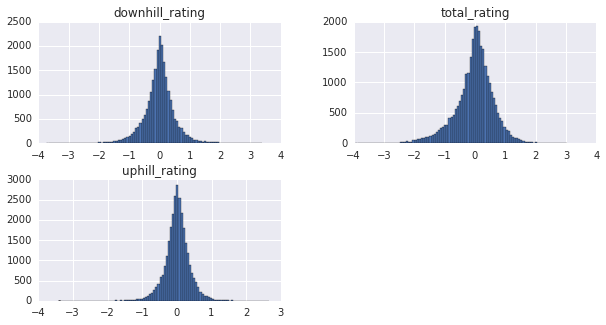

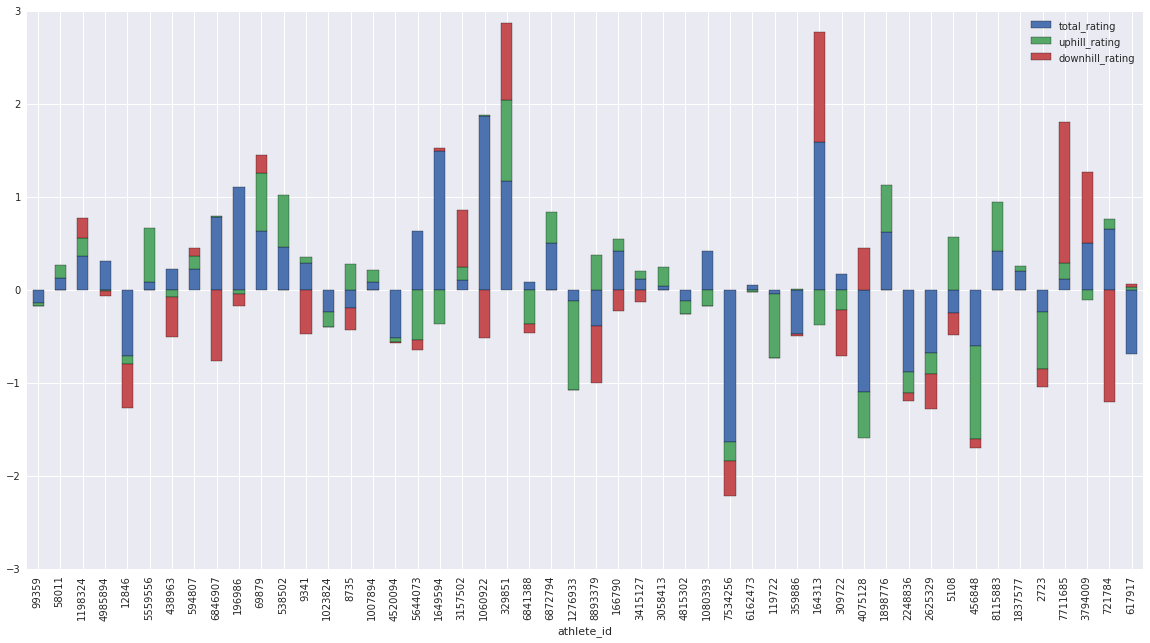

In [33]:
vm.plot_ratings(athlete_ratings)

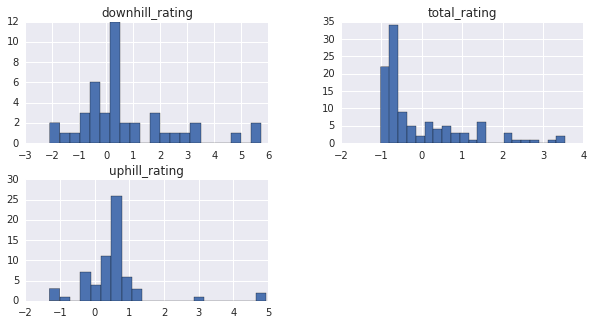

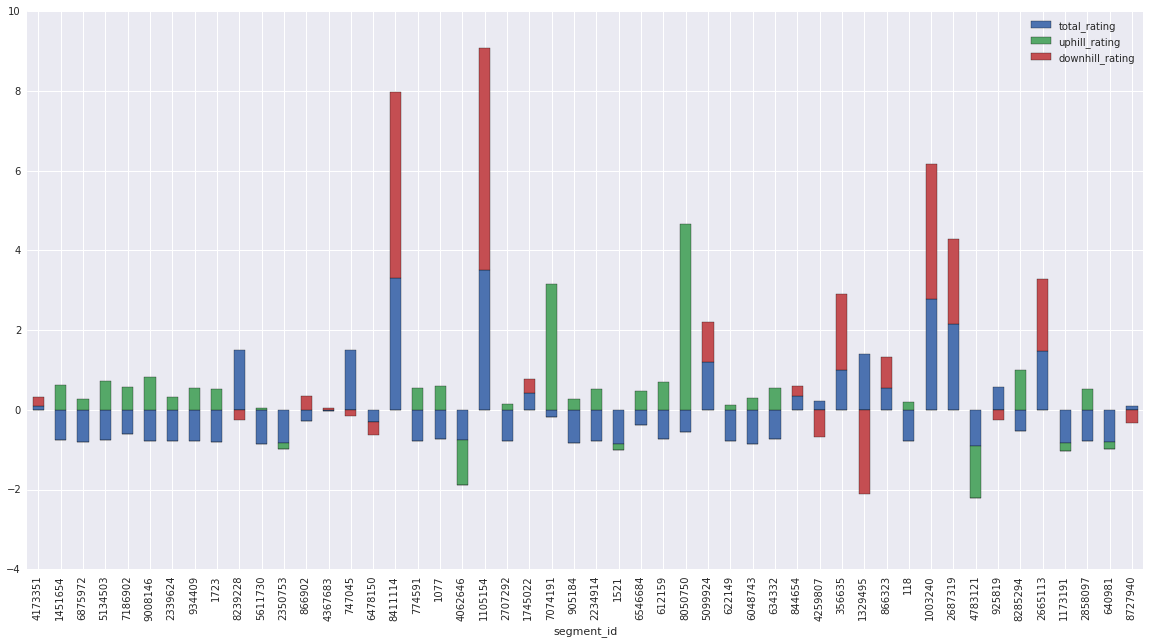

In [34]:
vm.plot_ratings(segment_ratings)

In [46]:
segment = 7481858 
segment_subset = df.query('segment_id == @segment')
speed_mean = segment_subset.average_speed.mean()
speed_std = segment_subset.average_speed.std()
inlier_query = '@speed_mean - 3 * @speed_std < average_speed < @speed_mean + 3 * @speed_std'
segment_subset.query(inlier_query).shape

(29320, 18)

In [47]:
segment_subset.shape

(29434, 18)